In [1]:
import sys
import os as os
sys.path.append(os.path.abspath(".."))
import numpy as np
import matplotlib.pyplot as plt
from utils import ISTA, IST
import scipy.io as sio
from scipy import stats

In [2]:
def observer(n, q, A, G, tau, lam, y, K):

    # Estimate x_tilda using ISTA
    lam_weights = np.concatenate((np.full(n, 10), np.full(q,20)))
    x_hat = []
    a_hat = []
    z_hat = []

    z_0 = np.zeros(n+q)
    x_hat.append(z_0[:n])
    a_hat.append(z_0[n:])
    z_hat.append(z_0)

    for k in range(K-1):
        z = z_hat[k] + (np.dot(tau, np.dot(G.T, (y[:,k] - np.dot(G, z_hat[k])))))
        gamma = tau * lam * lam_weights
        z_hat_plus = IST(z, gamma)
        x_hat.append(np.dot(A,z_hat_plus[:n]))
        a_hat.append(z_hat_plus[n:])
        z_hat.append(np.hstack((x_hat[k+1], a_hat[k+1])))
    return x_hat, a_hat

In [3]:
def task_4():
    np.set_printoptions(formatter={'all': lambda x: "{:.4g}".format(x)})
    cwd = os.getcwd()
    #original matrices
    mat = sio.loadmat(cwd + r'/../utils/tracking_moving_targets.mat')
    A = mat['A']
    y = mat['Y']
    D = mat['D']
    n = D.shape[1]
    q = D.shape[0]
    K = y.shape[1]

    G = np.hstack((D, np.eye(q)))
    #normalize G
    G = stats.zscore(G, axis=0)

    tau = 1 / (np.linalg.norm(G, ord=2)**2) - 10**(-8)
    lam = 1
    x_hat, a_hat = observer(n, q, A, G, tau, lam, y, K)


    # # Extract the estimated targets' location by taking the 3 greatest values of the first n elements of w_estimated
    # estimated_targets_location = np.argsort(w_estimated[:n])[-3:]

    # # Extract the estimated attacked vectors from the support of the last q eleemnts of w_estimated
    # estimated_attacked_sensors = np.where(w_estimated[n:] != 0)[0]
    
    # print("Estimated targets location: ", estimated_targets_location)
    # print("Estimated attacked sensors: ", estimated_attacked_sensors)

    H = 10  # Grid's height (# celle)
    L = 10  # Grid's length (# celle)
    W = 100  # Cell's width (cm)

    room_grid = np.zeros((2, n))
    for i in range(n):
        room_grid[0, i] = W//2 + (i % L) * W
        room_grid[1, i] = W//2 + (i // L) * W
    
    fig, ax = plt.subplots()
    true_location = []
    true_location.append([21,34,85])
    # append other 49 true locations by subtracting 1 from each element
    for i in range(49):
        true_location.append([x-1 for x in true_location[i]])

    


    for x,true_x,a in zip(x_hat,true_location, a_hat):
        estimated_targets_location = np.argsort(x)[-3:]
        estimated_attacked_sensors = np.argsort(a)[-2:]
        print("Estimated attacked sensors: ", estimated_attacked_sensors)

        # Pulisci il grafico precedente
        ax.clear()

        # Plotta i nuovi dati
        ax.plot(room_grid[0, true_x], room_grid[1, true_x], 's', markersize=9, 
                markeredgecolor=np.array([40, 208, 220])/255, 
                markerfacecolor=np.array([40, 208, 220])/255)
        # update true location by subtracting 1 from each element as red circles
        ax.plot(room_grid[0, estimated_targets_location], room_grid[1, estimated_targets_location], 'x', markersize=9, 
                markeredgecolor=np.array([255, 0, 0])/255, 
                markerfacecolor=np.array([255, 255, 255])/255)


        ax.grid(True)
        ax.legend(['True Targets', 'Estimated Targets'], loc='best')

        ax.set_xticks(np.arange(100, 1001, 100))
        ax.set_yticks(np.arange(100, 1001, 100))
        ax.set_xlabel('(cm)')
        ax.set_ylabel('(cm)')
        ax.set_xlim([0, 1000])
        ax.set_ylim([0, 1000])
        ax.set_aspect('equal', adjustable='box')

        # Aggiorna la figura
        plt.pause(0.5)
        

    # Mostra il grafico finale
    plt.show()
    return 

Estimated attacked sensors:  []


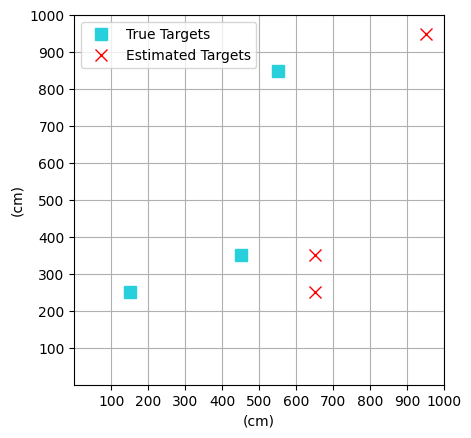

Estimated attacked sensors:  [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Estimated attacked sensors:  [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Estimated attacked sensors:  [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 24]
Estimated attacked sensors:  [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 22 23 24]
Estimated attacked sensors:  [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


KeyboardInterrupt: 

In [4]:
task_4()